In [3]:
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 4, cluster_std = 1.67, random_state = 42)

# k-means

K-means is one of the most popular clustering algorithms. It works as follows:

1. Initializing cluster centers:
- The algorithm starts by choosing k random points in the feature space as initial cluster centers.

2. Assigning objects to clusters:
- For each data object, the algorithm calculates the distance to each of the k cluster centers.
- An object is assigned to the cluster whose center is closest to this object.

3. Updating cluster centers:
- After all objects have been assigned to clusters, the algorithm recalculates the cluster centers as the average values ​​of all objects belonging to the corresponding cluster.

4. Repeating steps 2-3:
- Steps 2 and 3 are repeated until the cluster centers no longer change significantly between iterations.

Key features of the K-means algorithm:

- It attempts to minimize the sum of the squared distances between objects and their assigned cluster centers.
- The number of clusters (k) must be specified in advance.
- The algorithm is sensitive to the initialization of cluster centers.
- It works well when clusters are spherical and of approximately equal size.

The main advantages of K-means are its ease of implementation and its efficiency for large datasets. However, it has limitations such as sensitivity to outliers and the need to specify the number of clusters in advance.

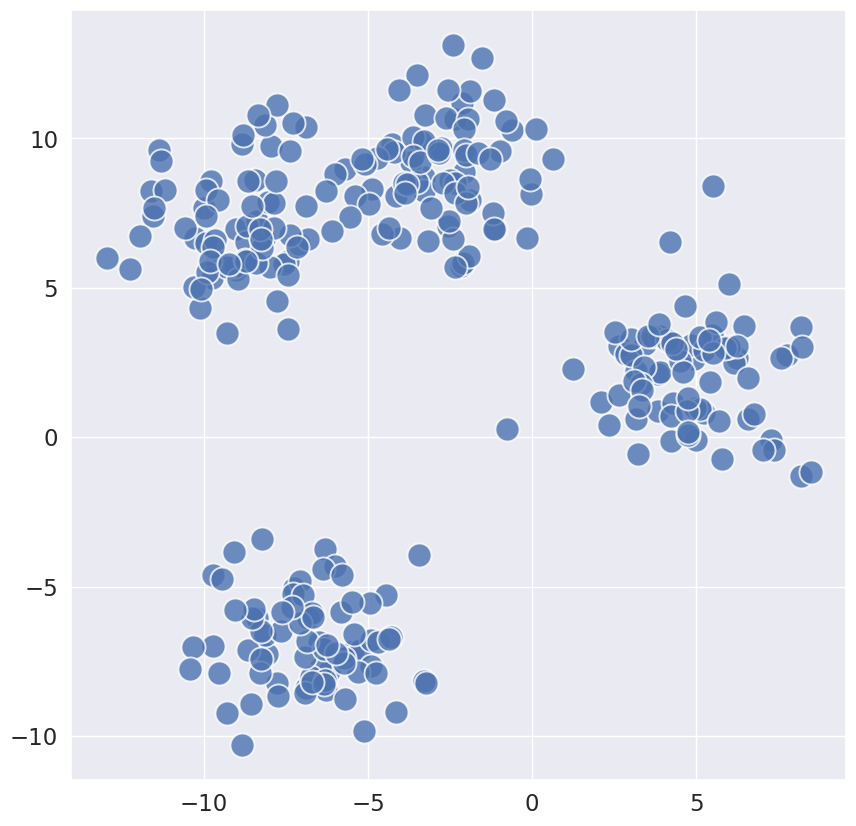

In [5]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], s = 300, alpha = 0.8)

In [6]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 1, max_iter = 50, tol=0.005)
y_km = km.fit_predict(X)

In [ ]:
len(y_km)

300

In [11]:
y_km = ['cluster ' + str(i) for i in y_km]

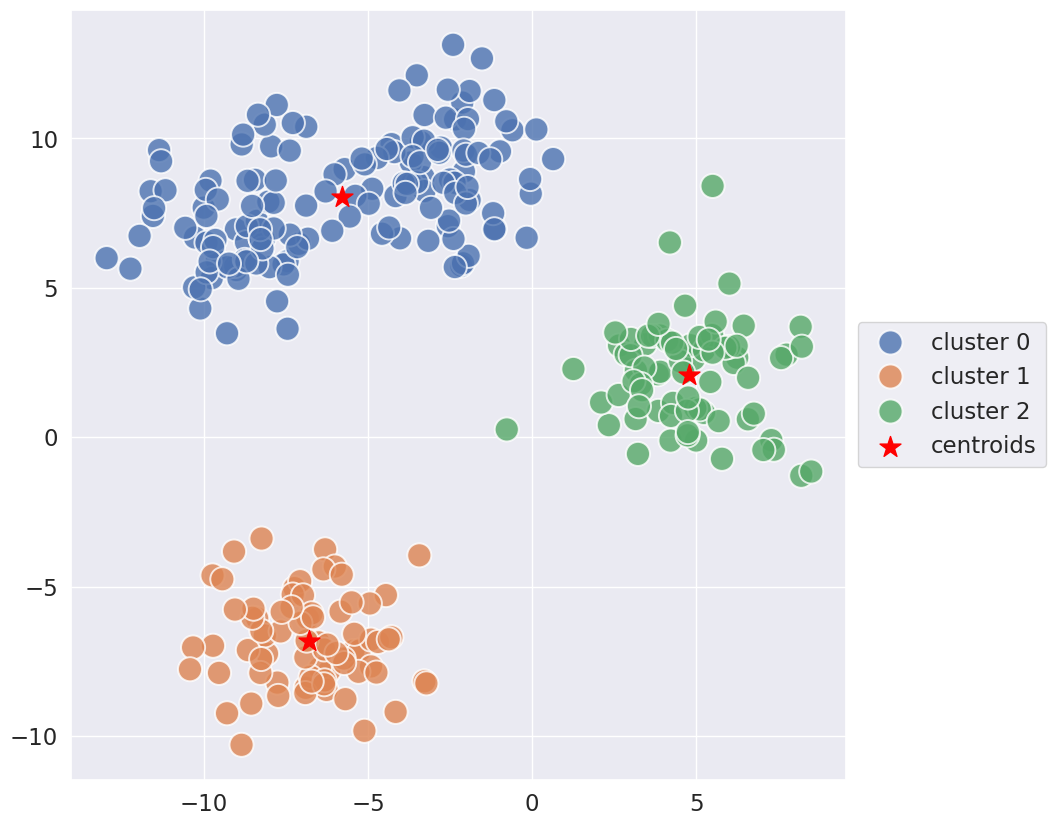

In [12]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'centroids')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [13]:
print('Sum of squared distances from objects to the nearest cluster center: %.2f' % km.inertia_)

Sum of squared distances from objects to the nearest cluster center: 3081.36


**Assessment of clustering quality**

The elbow method is one of the ways to determine the optimal number of clusters k in the k-means algorithm.

The principle of the elbow method is as follows:

1. The k-means algorithm is launched for different values ​​of k (for example, from 1 to 10).
2. For each value of k, the clustering quality metric is calculated, usually this is the sum of squared distances between points and their cluster centers (SSE - sum of squared errors).
3. The obtained SSE values ​​​​for different k are plotted on a graph.
4. The shape of the resulting curve is analyzed. As a rule, it has the form of a decreasing function, where for small k, the SSE decreases quickly, and for large k, the decrease slows down.
5. The point on the graph where the curve changes its slope and becomes flatter is called the "elbow". This is considered the optimal number of clusters k.
The idea of ​​​​the elbow method is that adding new clusters after the "elbow" does not provide a significant improvement in the quality of clustering. Therefore, k corresponding to the "elbow" is considered optimal.

The elbow method is heuristic, but often gives good results in practice. It helps to avoid choosing too many or too few clusters.

In [14]:
sse = []
k_list = range(1, 31)
for k in k_list:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)

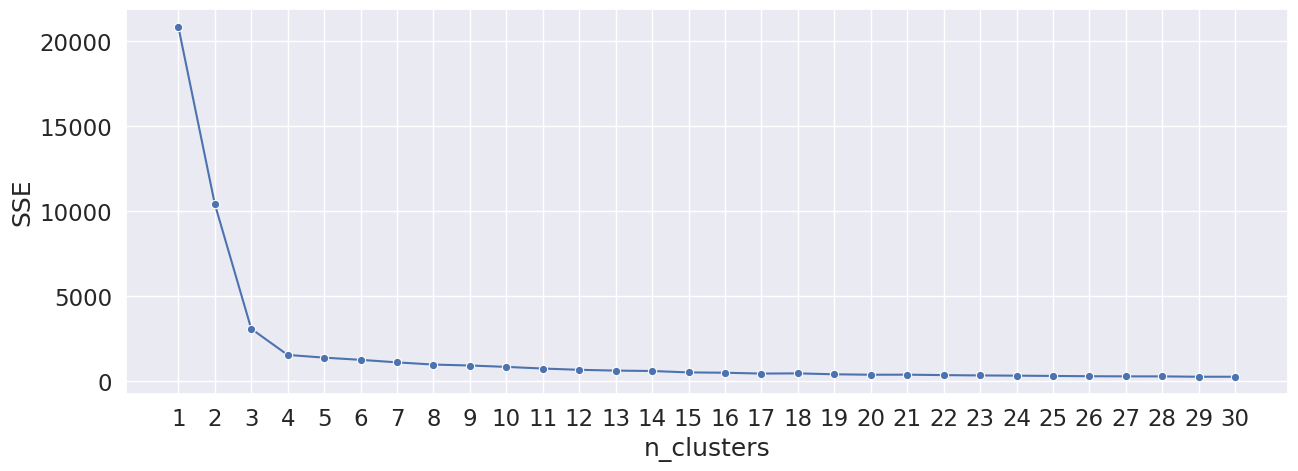

In [15]:
sse_km = pd.DataFrame({'SSE': sse, 'n_clusters': list(k_list)})

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(range(1, 31, 1))
sns.lineplot(data = sse_km, x = "n_clusters", y = "SSE", marker = 'o');

The silhouette coefficient is a metric that evaluates the quality of clustering for each data point. It takes values ​​between -1 and 1 and shows how well each point fits its cluster compared to other clusters.

The silhouette coefficient for a point i is calculated as follows:

1. The average distance a(i) from point i to all other points in the same cluster is calculated. This shows how well point i fits its cluster.
2. The minimum average distance b(i) from point i to all points in other clusters is calculated. This shows how close point i is to its neighboring cluster.
3. The silhouette coefficient for point i is calculated as:
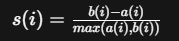

The value of s(i) ranges from -1 to 1:

* If s(i) is close to 1, then point i fits well into its cluster and poorly into other clusters.
* If s(i) is close to 0, then point i is on the boundary between clusters.
* If s(i) is close to -1, then point i is probably misclassified into this cluster.

The average silhouette coefficient over all points is used as an overall metric for clustering quality. Higher silhouette coefficient values ​​correspond to better clustering.

In [16]:
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

In [32]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 10, tol = 0.001)
y_km = km.fit_predict(X)

In [33]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(init='random', max_iter=10, n_clusters=3,
                                      n_init=1, tol=0.001))

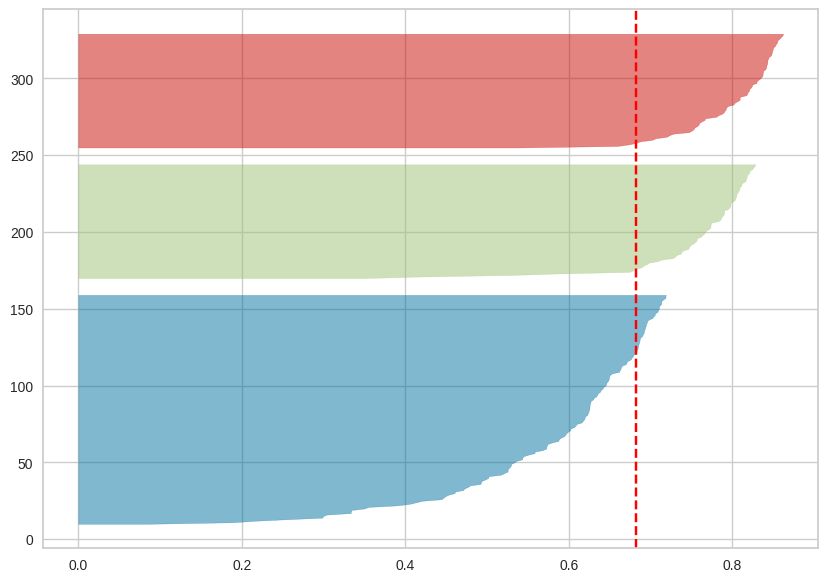

In [35]:
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
f, ax = plt.subplots(figsize=(10, 7))
visualizer.fit(X)

In [34]:
silhouette_vals.mean()

0.6824353248321798

In [36]:
km = KMeans(n_clusters = 6, init = 'random', n_init = 1, max_iter = 10, tol = 0.001)
y_km = km.fit_predict(X)

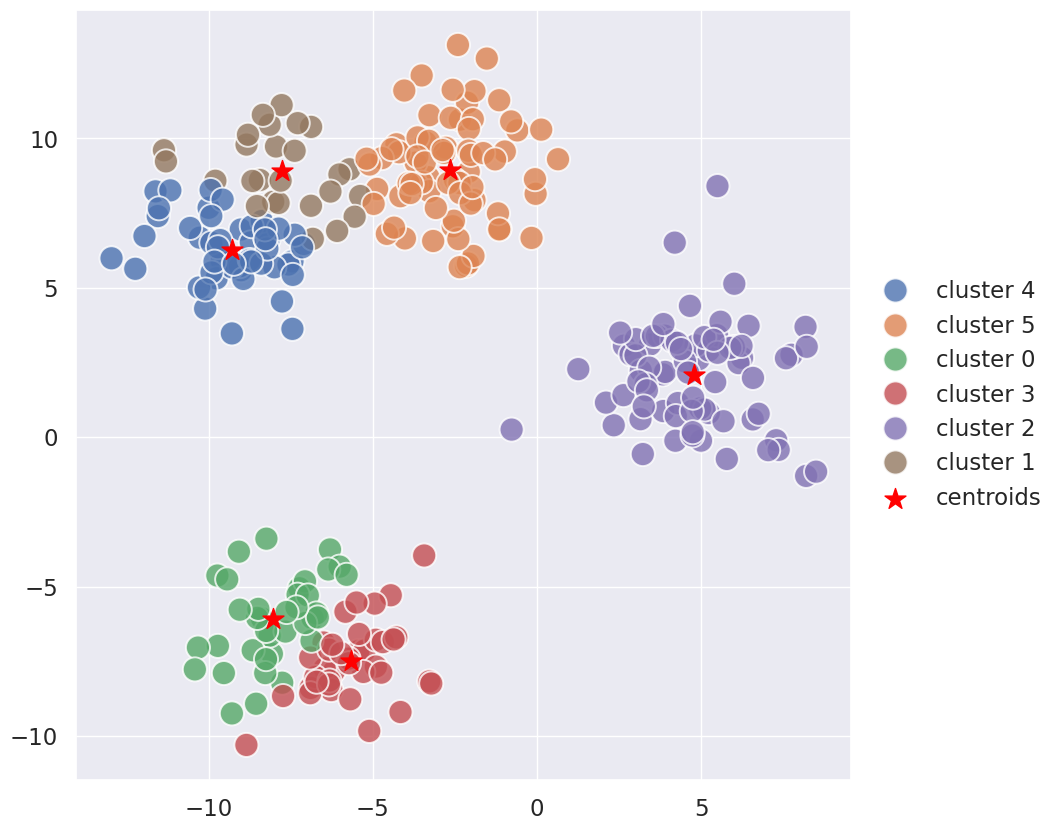

In [37]:
y_km = ['cluster ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'centroids')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [38]:
print('Sum of squared distances from objects to the nearest cluster center: %.2f' % km.inertia_)

Sum of squared distances from objects to the nearest cluster center: 1249.23


In [39]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(init='random', max_iter=10, n_clusters=6,
                                      n_init=1, tol=0.001))

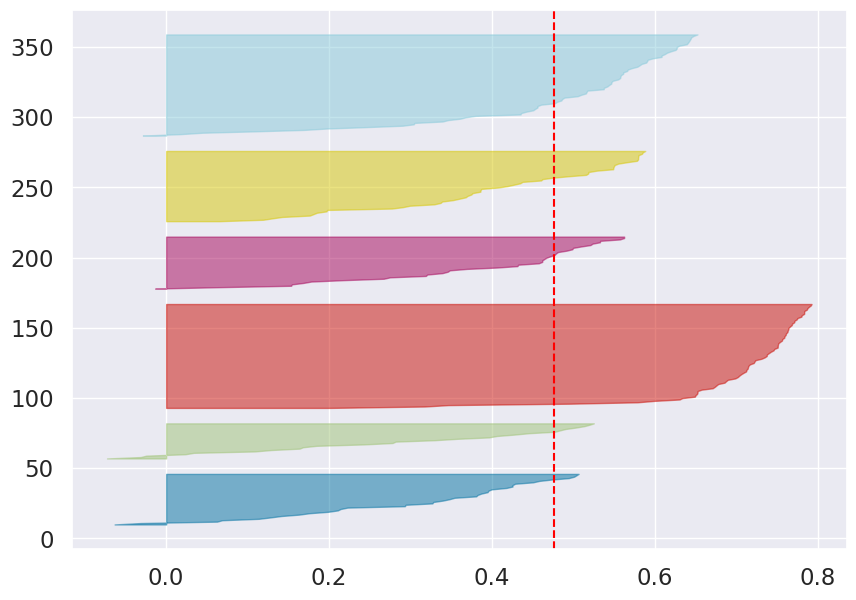

In [40]:
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
f, ax = plt.subplots(figsize=(10, 7))
visualizer.fit(X)

In [ ]:
silhouette_vals.mean()

0.5621809556846861

# Hierarchical clustering

Hierarchical clustering is a family of clustering algorithms that build a hierarchical structure of clusters. The basic steps of these algorithms are:

1. Initialization:
- Each data object starts as a separate cluster.

2. Cluster merging:
- At each step, the algorithm finds two closest clusters and merges them into a single new cluster.
- The distance between clusters is calculated using one of the linkage metrics:
- Single linkage: the minimum distance between objects in clusters.
- Complete linkage: the maximum distance between objects in clusters.
- Average linkage: the average distance between objects in clusters.

3. Dendrogram construction:
- The process of merging clusters continues until all objects are combined into a single cluster.
- The result is presented as a dendrogram - a hierarchical tree of clusters.

4. Determining the number of clusters:
- The user can choose the optimal number of clusters by "cutting" the dendrogram at the desired level.

The main advantages of hierarchical clustering:
- No need to determine the number of clusters in advance.
- Allows you to visualize the structure of the data using a dendrogram.
- Can detect clusters of different shapes and sizes.

Disadvantages:
- High computational complexity for large data sets.
- Sensitivity to outliers and noise in the data.

Hierarchical clustering is well suited for exploratory data analysis and visualization of the data structure.

In [ ]:
np.random.seed(123)
variables = ['Х', 'Y', 'Z']
labels = ['ID_O', 'ID_l', 'ID_2', 'ID_З', 'ID_4', 'ID_5']
X = np.random.random_sample([6, 3])*10
df = pd.DataFrame(X, columns = variables , index = labels)
df

Х         Y         Z
ID_O  6.964692  2.861393  2.268515
ID_l  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_З  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443
ID_5  7.379954  1.824917  1.754518

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

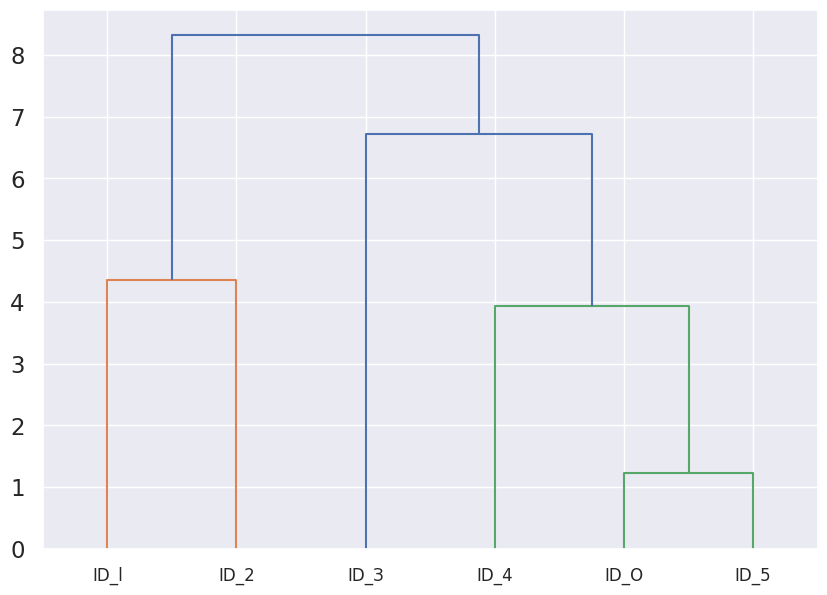

In [ ]:
row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')
f, ax = plt.subplots(figsize=(10, 7))
row_dendr = dendrogram(row_clusters, labels = labels)

In [ ]:
ac = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(df)
ac_res

array([0, 1, 1, 0, 0, 0])

In [ ]:
X, y = make_blobs(n_samples = 250, n_features = 2, centers = 5, cluster_std = 1.5, shuffle = True, random_state = 0)

In [ ]:
df_X = pd.DataFrame(X, columns = ['X', 'Y'])

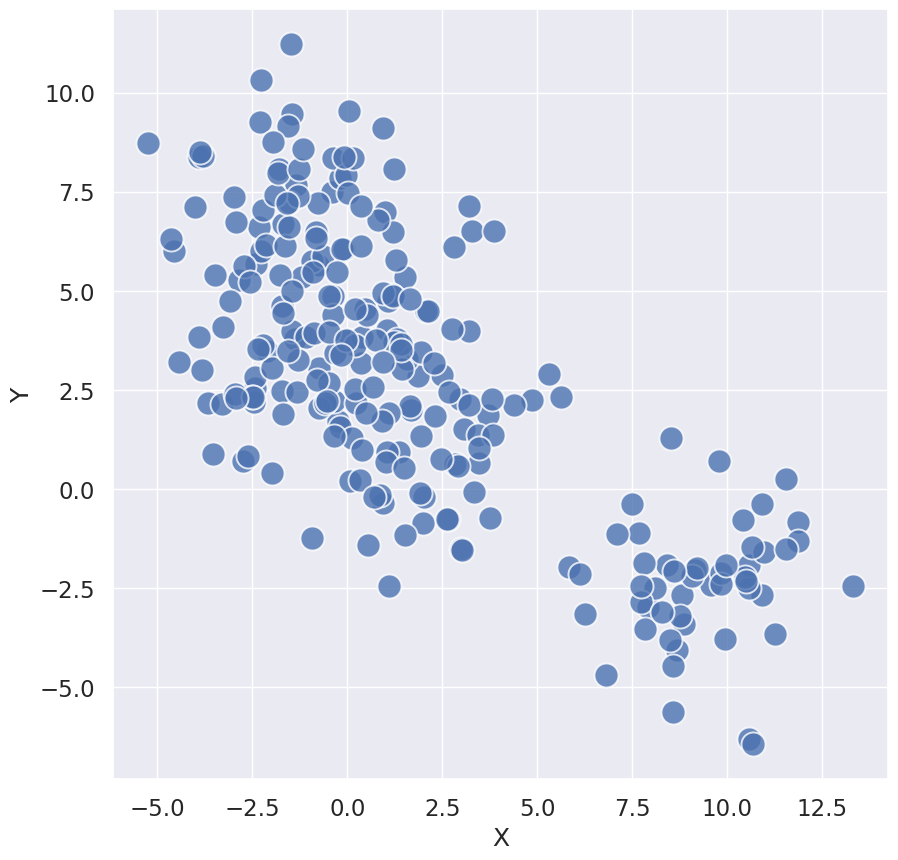

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(data = df_X, x = 'X', y = 'Y', s = 300, alpha = 0.8)

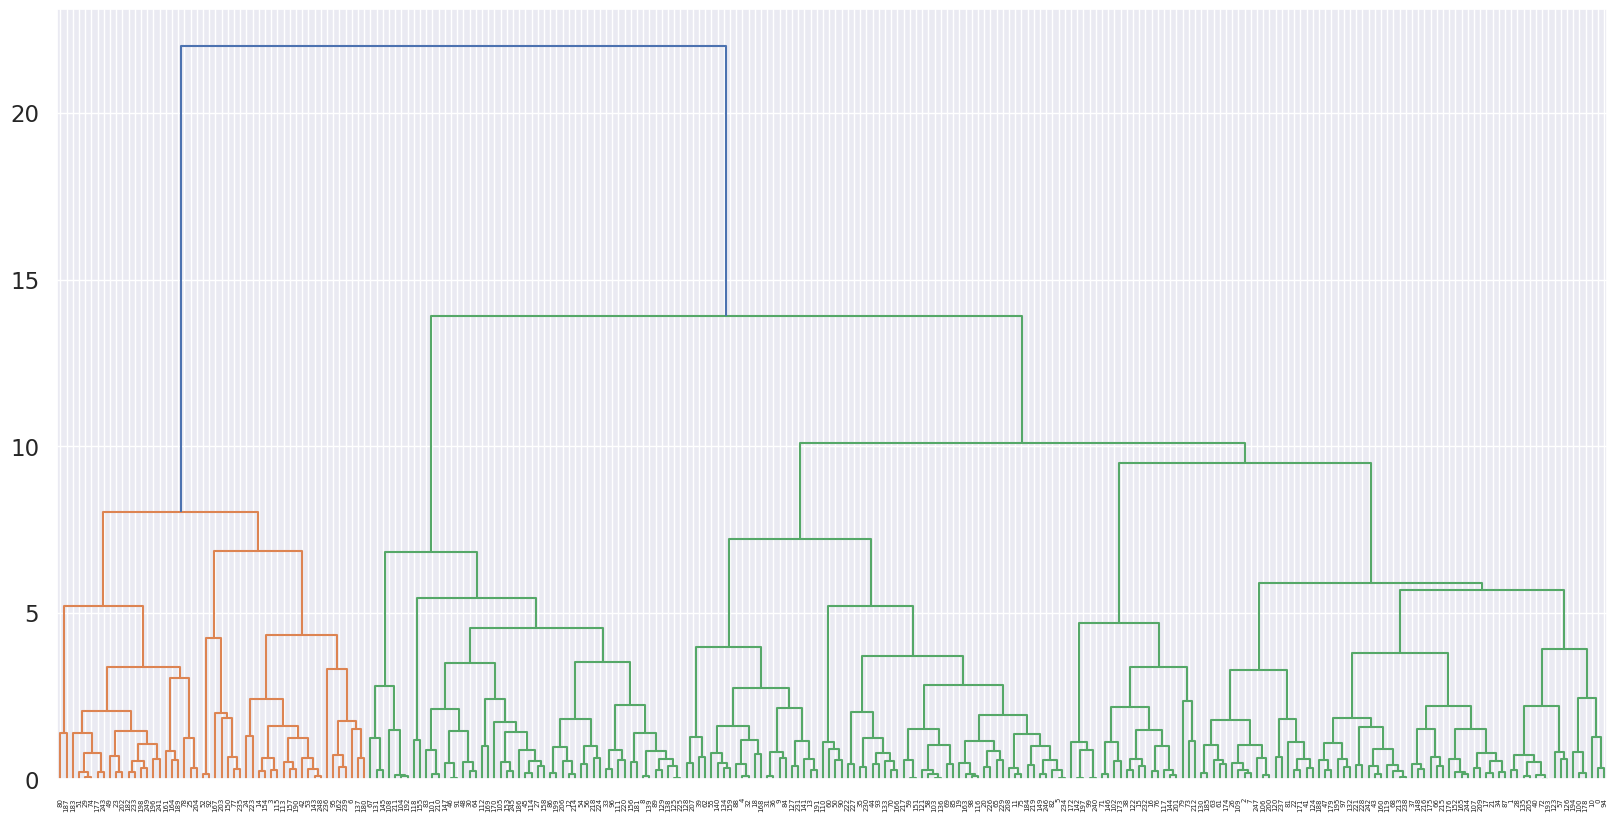

In [ ]:
row_clusters = linkage(df_X.values, method = 'complete', metric = 'euclidean')
f, ax = plt.subplots(figsize=(20, 10))
row_dendr = dendrogram(row_clusters)

In [ ]:
ac = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(df_X)
ac_res

array([3, 2, 2, 2, 3, 3, 0, 0, 3, 1, 0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 3, 1,
       0, 2, 0, 3, 3, 0, 0, 2, 2, 1, 3, 0, 0, 2, 0, 0, 0, 2, 2, 3, 1, 1,
       0, 3, 1, 0, 1, 2])

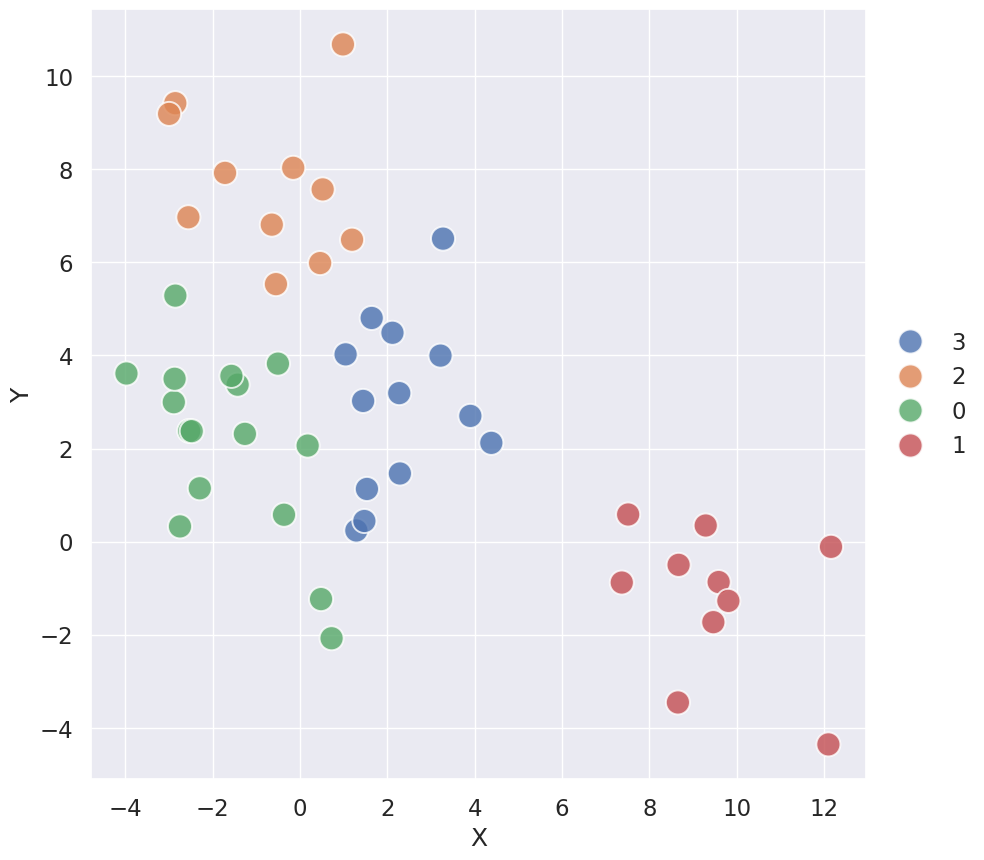

In [ ]:
ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(data = df_X, x = 'X', y = 'Y', hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

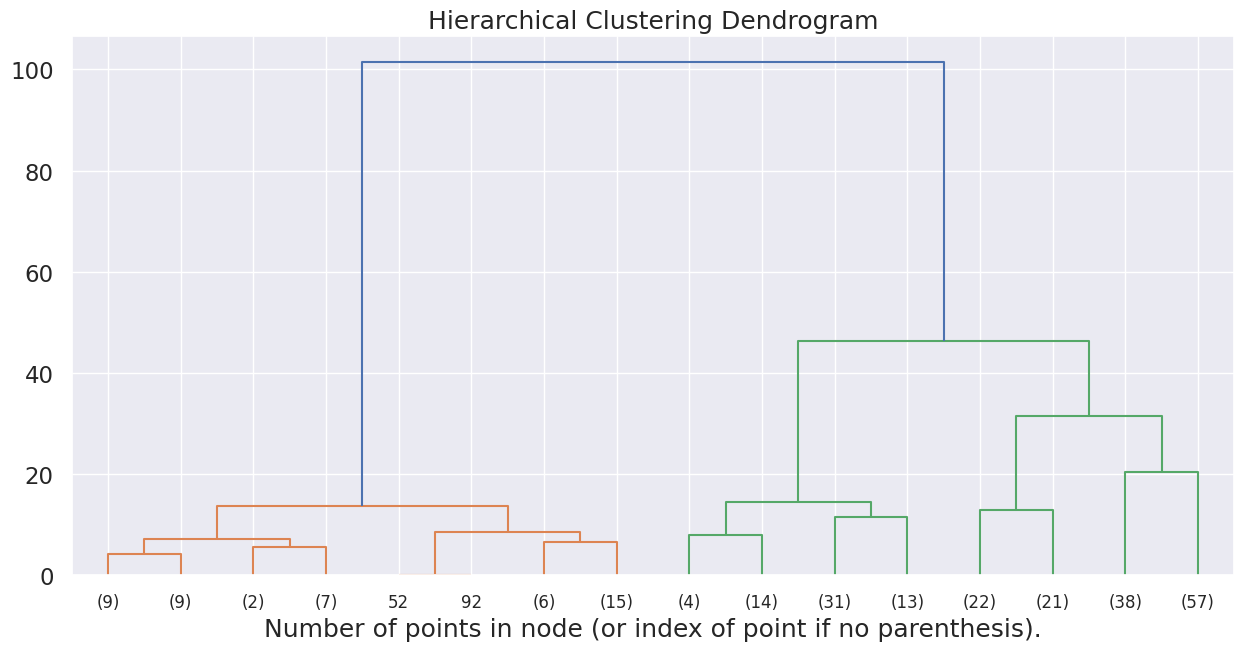

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(df_X)

f, ax = plt.subplots(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# What if we have a complicated case?

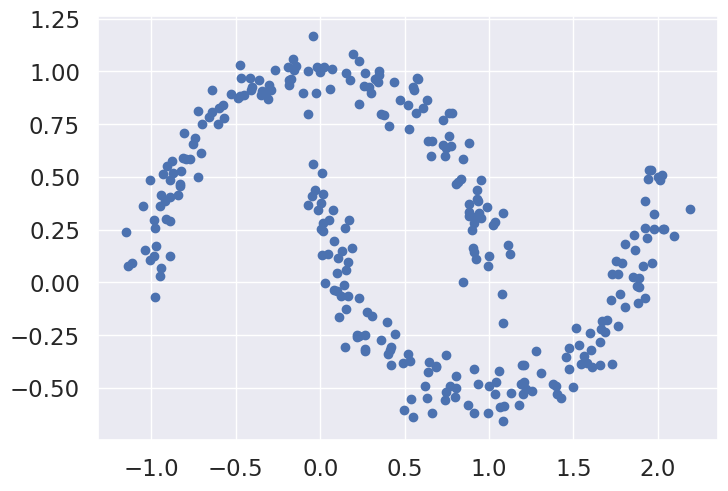

In [41]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 300, noise=0.075, random_state = 0)
plt.scatter(X[:, 0] , X[:, 1])
plt.show()

In [48]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 1, max_iter = 10)
y_km = km.fit_predict(X)

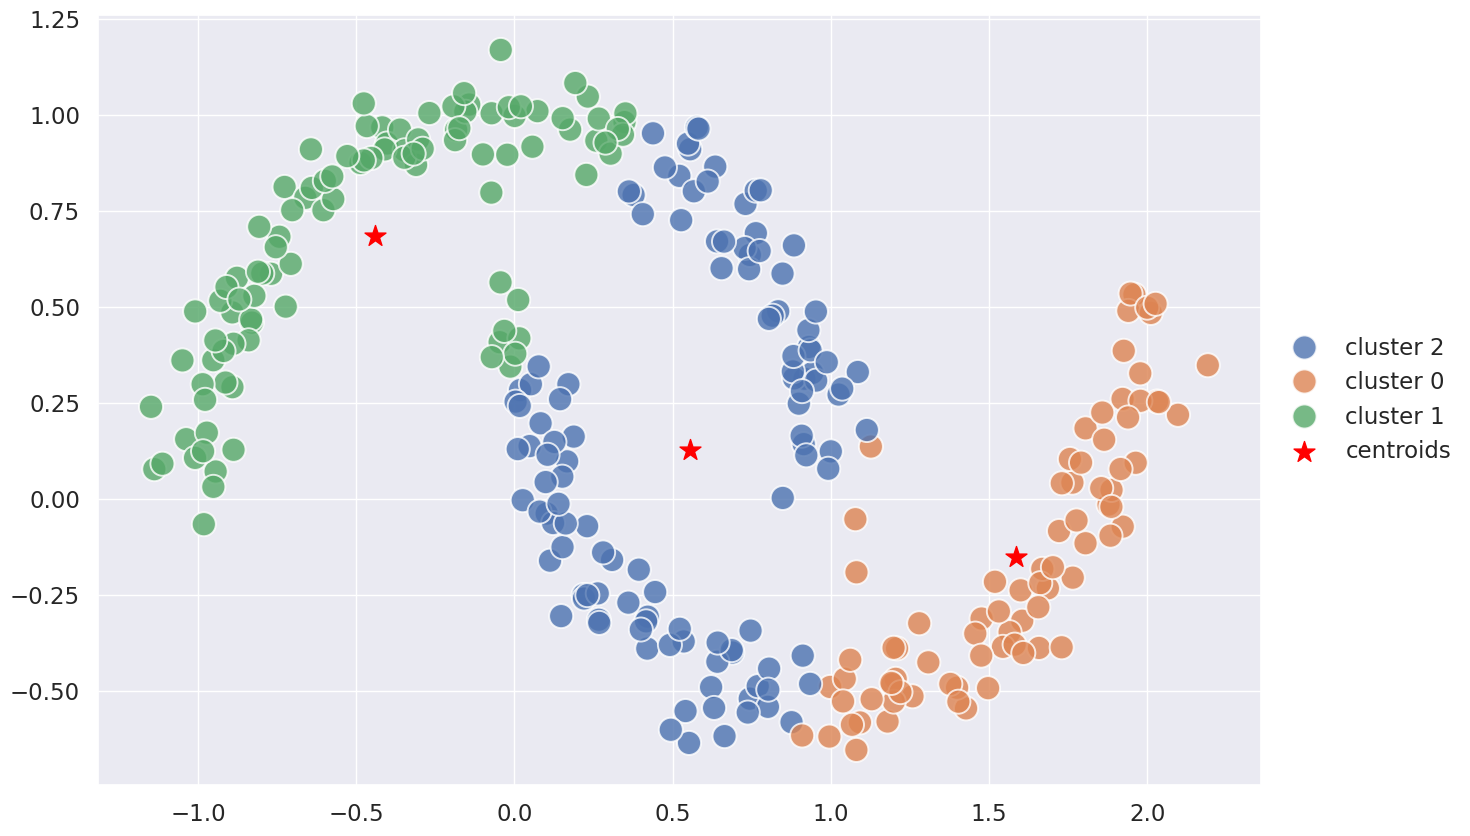

In [49]:
y_km = ['cluster ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'centroids')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [50]:
print('Sum of squared distances from objects to the nearest cluster center: %.2f' % km.inertia_)

Sum of squared distances from objects to the nearest cluster center: 83.81


In [51]:
sse = []
k_list = range(1, 11)
for k in k_list:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)

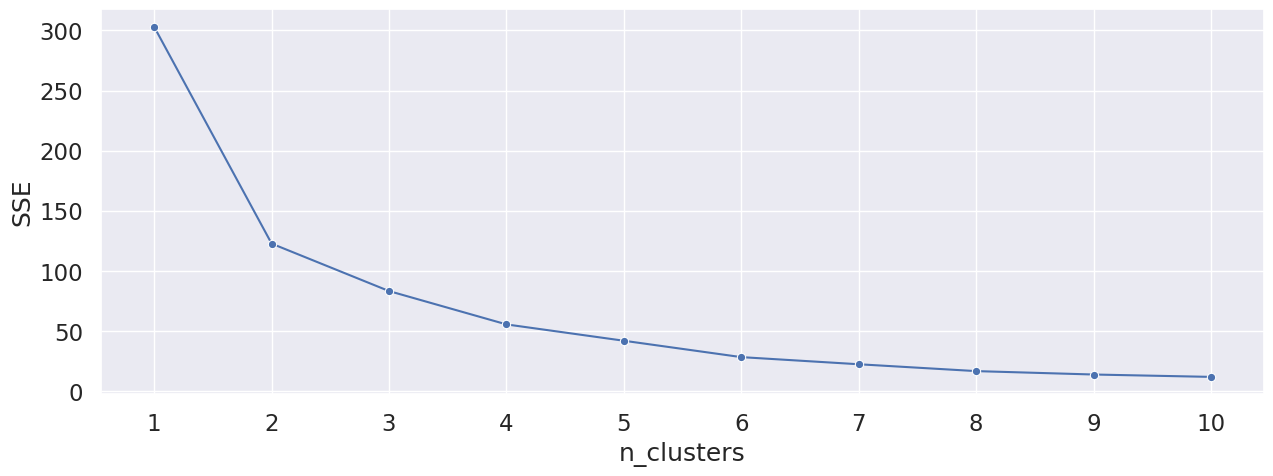

In [52]:
sse_km = pd.DataFrame({'SSE': sse, 'n_clusters': list(k_list)})

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(range(1, 11, 1))
sns.lineplot(data = sse_km, x = "n_clusters", y = "SSE", marker = 'o');

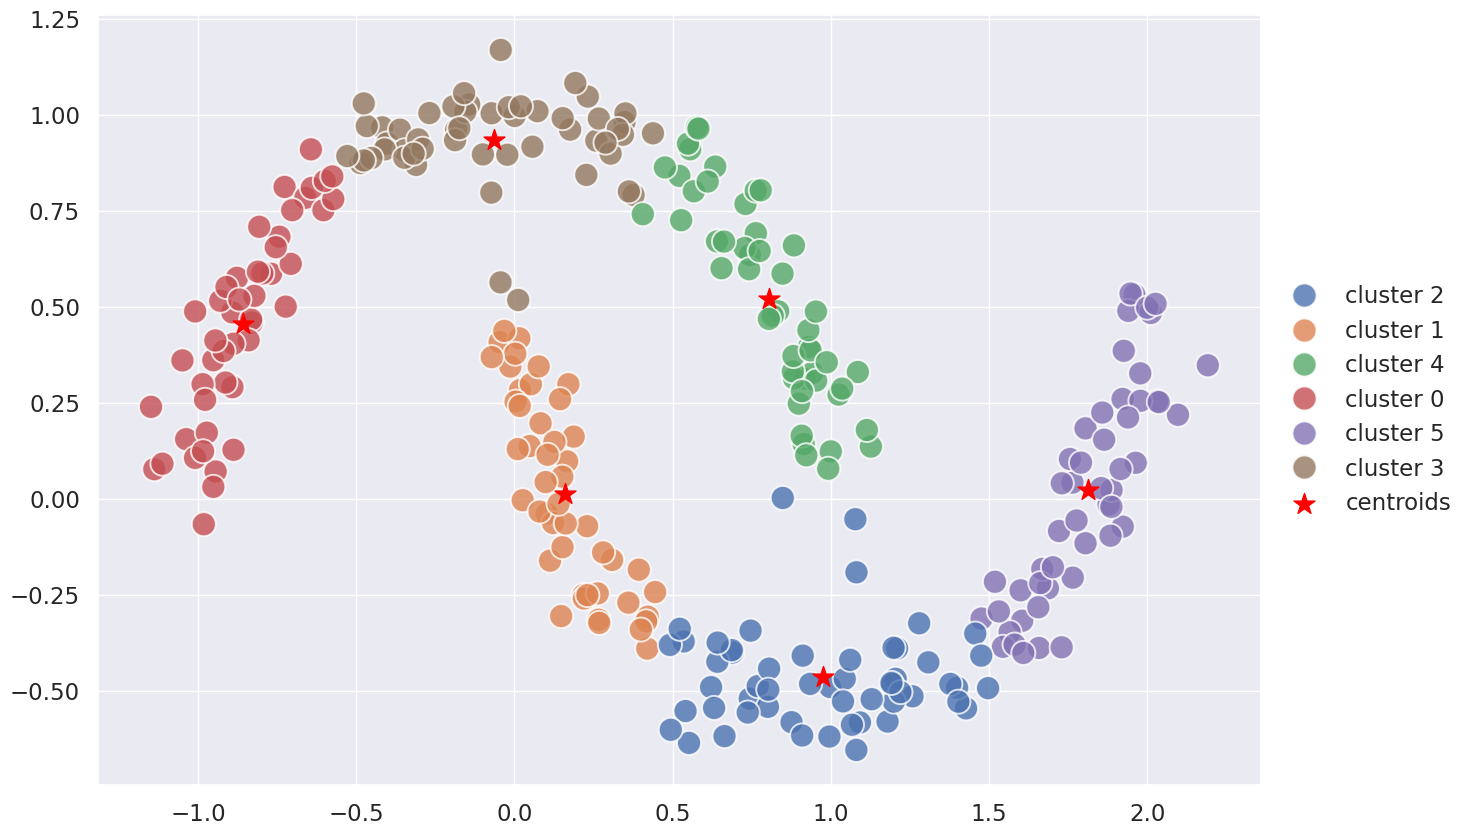

In [53]:
km = KMeans(n_clusters = 6 , init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(X)

y_km = ['cluster ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'centroids')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

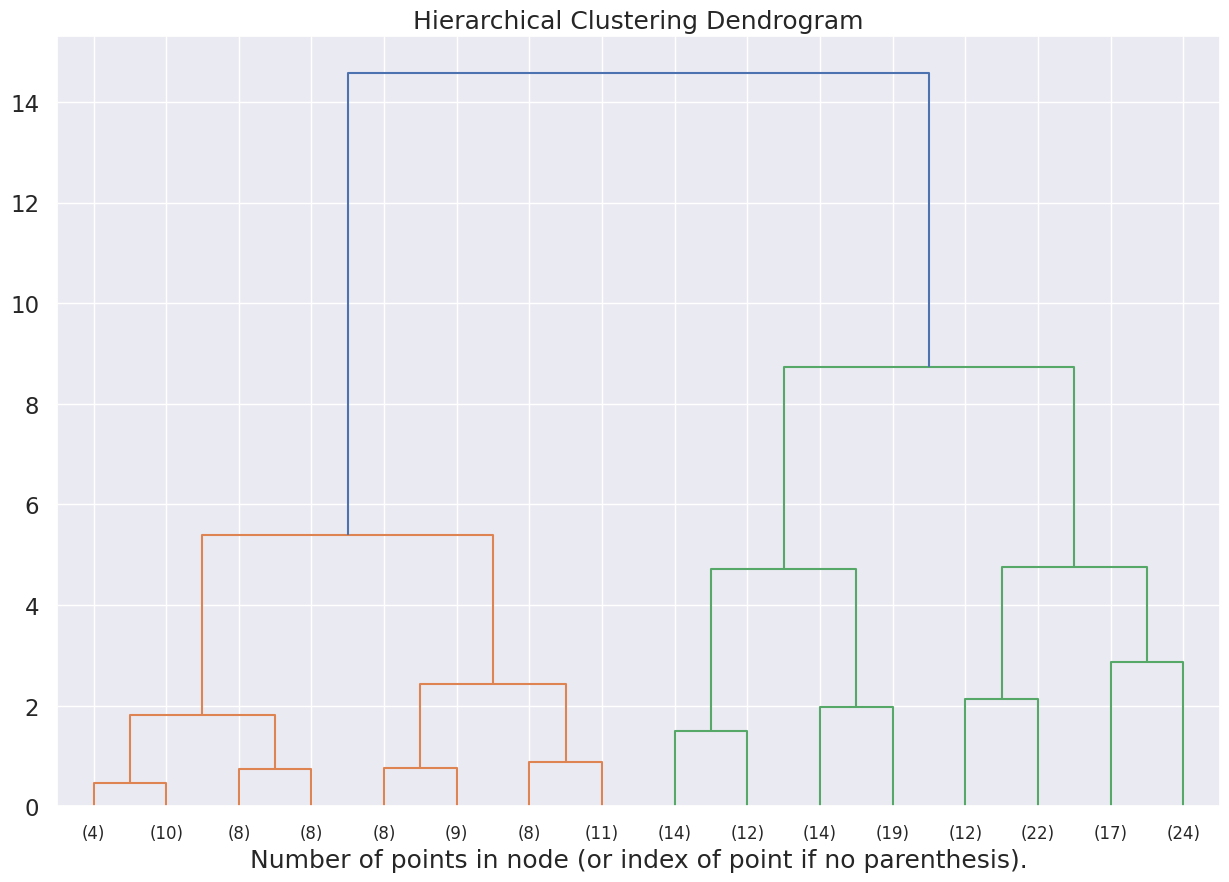

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(X)

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

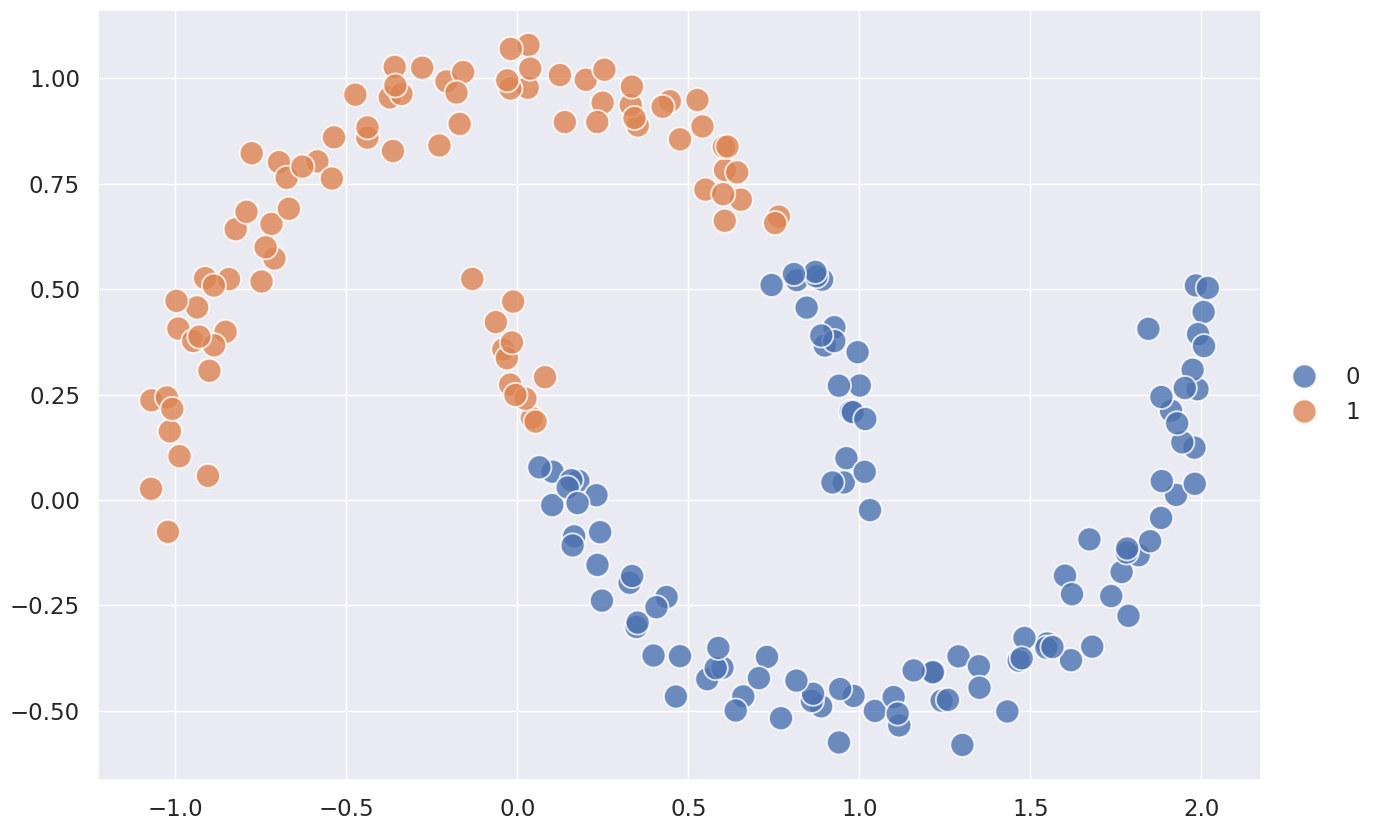

In [ ]:
ac = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(X)

ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

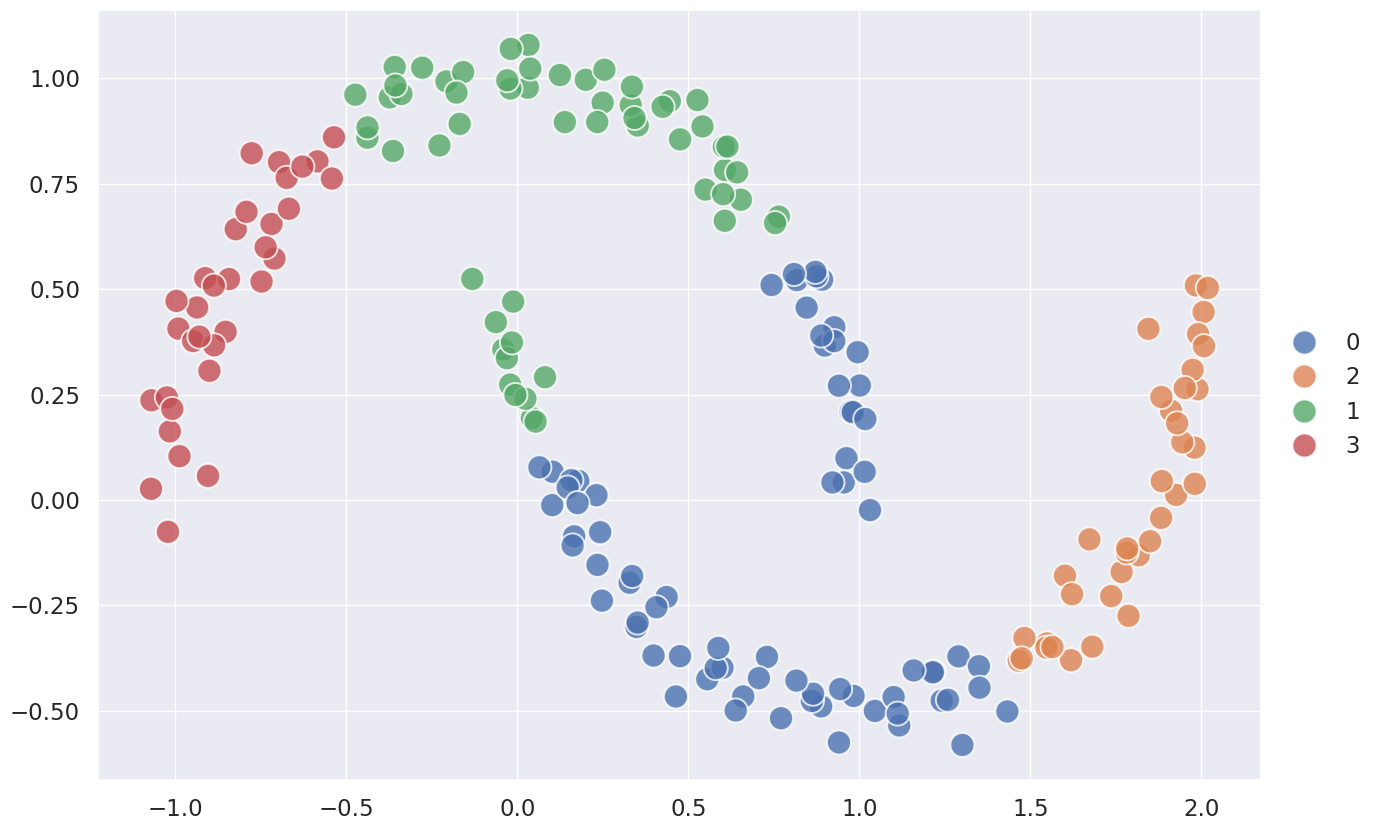

In [ ]:
ac = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(X)

ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It works as follows:

1. Parameters:
- The algorithm takes two main parameters:
- Eps is the maximum distance between two points to be considered neighbors.
- MinPts is the minimum number of points required to form a dense cluster.

2. Finding neighbors:
- For each data point, the algorithm finds all points that are no more than Eps away.

3. Determining the type of points:
- Points are divided into three types:
- Core points are points with neighbors >= MinPts.
- Border points are points with neighbors < MinPts, but are within Eps of a core point.
- Noise points are points that are neither core nor border points.

4. Cluster construction:
- The algorithm starts with an arbitrary core point and recursively adds all its reachable (connected) core and boundary points to the cluster.
- Noise points are not included in the clusters.

5. Iteration:
- The process is repeated for all core points until all clusters are found.

Key features of DBSCAN:
- Does not require pre-determining the number of clusters.
- Can detect clusters of arbitrary shapes.
- Robust against outliers, which are labeled as noise.
- Efficient for large datasets.

The main advantages of DBSCAN are its ability to detect clusters of complex shapes and its robustness to noise. However, choosing the right values ​​for the Eps and MinPts parameters can be challenging.

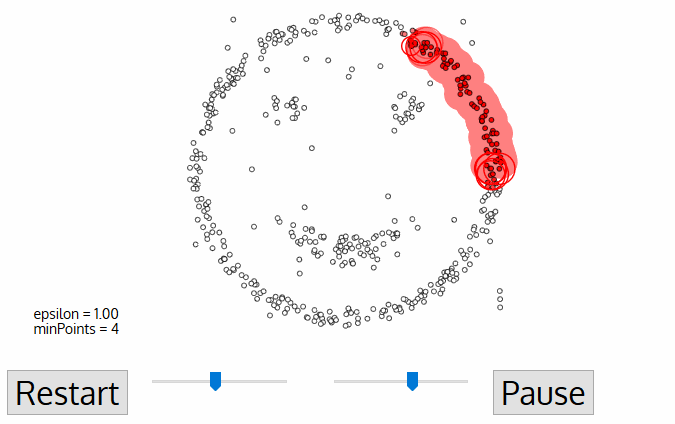

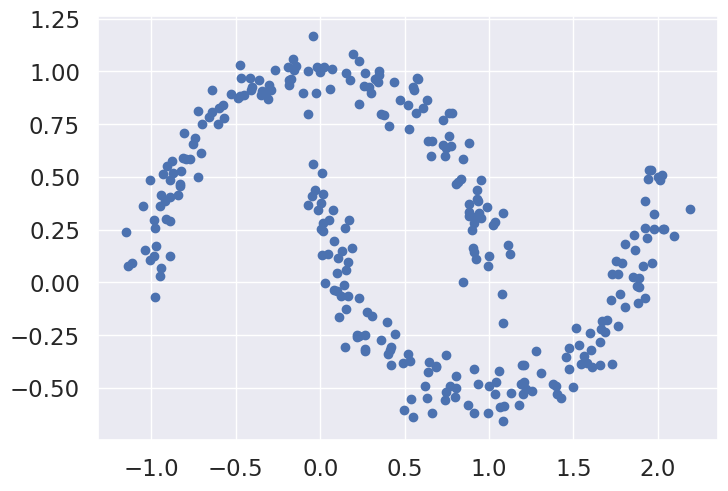

In [54]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 300, noise=0.075, random_state = 0)
plt.scatter(X[:, 0] , X[:, 1])
plt.show()

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
db = DBSCAN(eps = 0.2, min_samples = 4)
y_db = db.fit_predict(X)

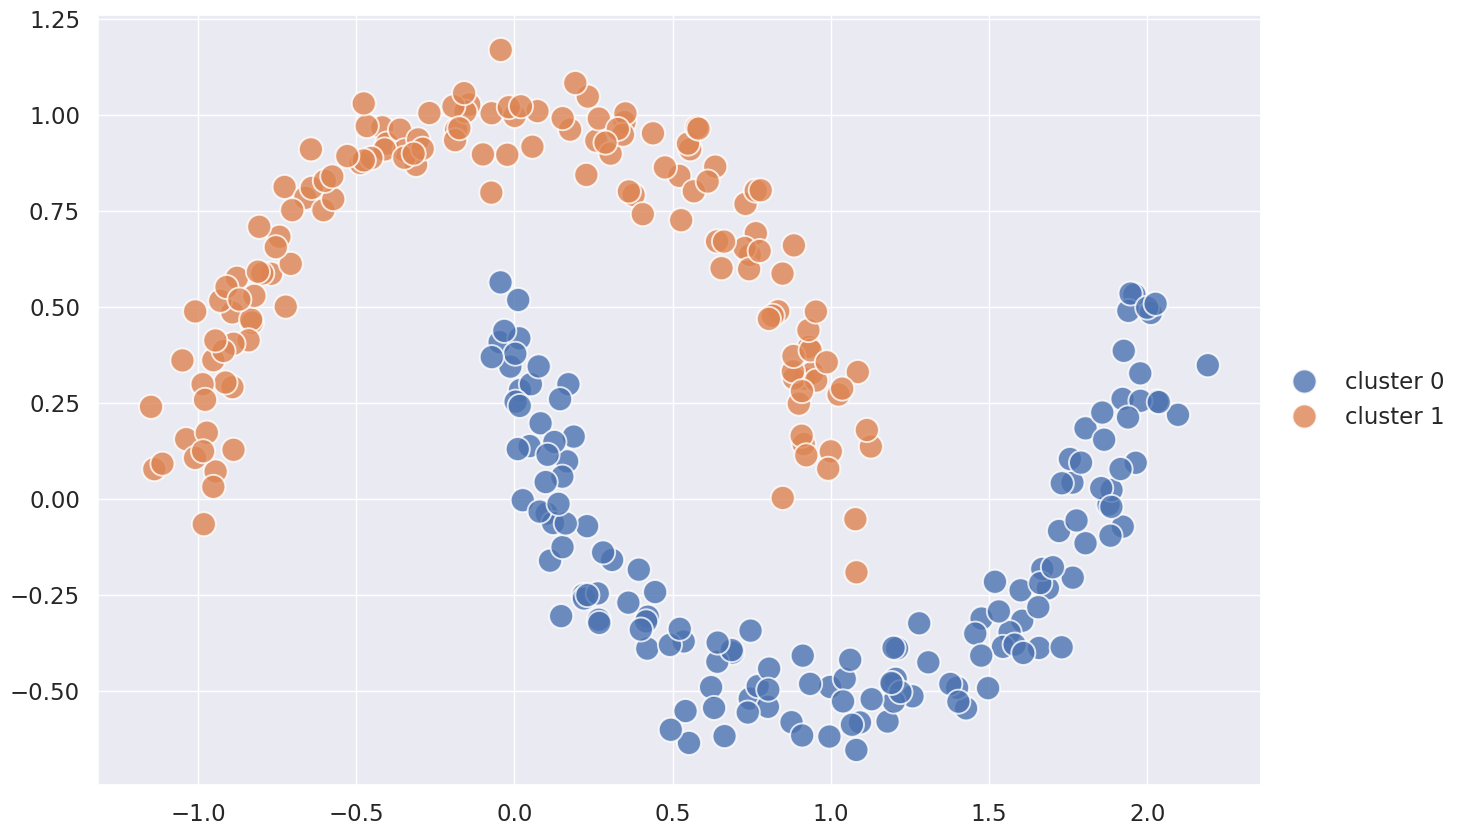

In [57]:
y_db = ['cluster ' + str(i) for i in y_db]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_db, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)